In [34]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
 
CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)
#DEVICE = 0 # default
 
p = pyaudio.PyAudio()
 
stream=p.open(format=pyaudio.paInt16,
              channels=2,
              rate=RATE,
              input=True,
              frames_per_buffer=CHUNK)

to_plot = []
 
while True:
    indata = np.fromstring(stream.read(CHUNK),dtype=np.int16)
 
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2
    # find the maximum
    to_plot.append(np.log(fftData))
    which = fftData[1:].argmax() + 1
    # use quadratic interpolation around the max
    print(which)

C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_10320/122874202.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  indata = np.fromstring(stream.read(CHUNK),dtype=np.int16)


7
4
4
4
82
82
80
80
80
68
68
8
15
15
15
15
15
15
17
83
83
17
122
83
19
103
70
13
18
83
70
70
70


C:\Users\GODOVO~1\AppData\Local\Temp/ipykernel_10320/122874202.py:25: RuntimeWarning: divide by zero encountered in log
  to_plot.append(np.log(fftData))


70
70
8
19
19
18
19
18
18
18
17
18
19
69
68
16
18
25
25
54
53
53
53
52
52
8
72
17
10
10
10
72
10
82
10
20
19
21
20
20
20
18
18
31
31
18
20
21
19
18
18
50
99
99
99
99
25
15
25
65
66
66
66
67
67
68
68
68
67
67
67
66
66
66
65
65
65
65
15
31
67
162
67
8
8
8
52
52
8
3
12
8
4
8
15
88
51
51
4
4
8
8
39
39
39
9
8
8
39
15
39
8
8
39
15
8
8
9
9
39
8


KeyboardInterrupt: 

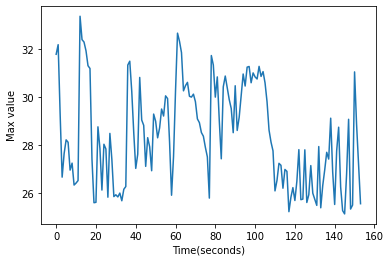

In [35]:
plt.xlabel('Time(seconds)')
plt.ylabel('Max value')

plt.plot([max(x) for x in to_plot])

In [ ]:
if which != len(fftData)-1:
        y0,y1,y2 = np.log(fftData[which-1:which+2:])
        x1 = (y2 - y0) * .5 / (2 * y1 - y2 - y0)
        # find the frequency and output it
        thefreq = (which+x1)*RATE/CHUNK
        print("The freq is %f Hz." % (thefreq))
    else:
        thefreq = which*RATE/CHUNK
        print("The freq is %f Hz." % (thefreq))